In [36]:
%matplotlib inline
import matplotlib.pylab as plt 
from scipy.optimize import curve_fit
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
sys.path.append('../code_general_Finkelsteinlab/')
import read_model_ID;
reload(read_model_ID);
import Nucleaseq_data_processing as processing
reload(processing);

In [3]:
filename = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../' + '/data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_nucleaseq(filename,path_to_data)


#for i in range(len(yerr)):
#    for j in range(len(yerr[i])):
#        yerr[i][j] = ydata[i][j]*0.05

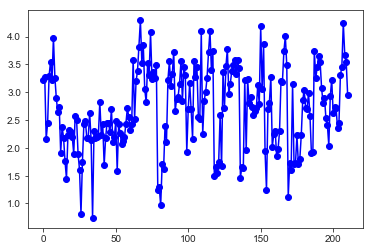

In [20]:
relative_error = np.zeros(len(xdata))
for i in range(len(xdata)):
    data = ydata[i]
    error = yerr[i]
    relative_error_temp = np.zeros(len(error))
    for j in range(len(error)):
        relative_error_temp[j] = data[j]/error[j]
    relative_error[i] = np.mean(relative_error_temp)
    
plt.plot(range(len(xdata)),relative_error,'b-o')
        

## No errors are very low

In [5]:
indices_low = np.where(relative_error<0.1)
low_error = relative_error[indices_low]
low_error

array([], dtype=float64)

## Several errors are very high

In [6]:
indices_high = np.where(relative_error>1)
high_error = relative_error[indices_high]
high_error

array([1.00744079e+00, 8.93221174e+16, 4.82776234e+00, 3.22101207e+19,
       4.53290529e+12, 2.35499606e+00, 1.75926930e+00, 1.20120561e+00,
       1.20653442e+00, 2.41137922e+16, 1.29078871e+14, 2.34516151e+19,
       3.78747999e+00, 1.16504779e+00, 1.09618282e+00, 1.44071635e+14,
       3.28972008e+14, 1.12636992e+00, 2.10358136e+16, 3.17398412e+13,
       7.54091510e+18, 6.16283032e+14, 1.03063220e+00, 2.95994661e+00,
       5.02843076e+12, 2.58962152e+18, 1.52842052e+00, 2.97597802e+00,
       6.49611285e+19, 4.15905470e+12, 1.08806057e+16, 1.09630806e+00,
       1.02123776e+00, 1.93133693e+13, 1.04726225e+14, 1.01472924e+00,
       8.59228684e+13, 2.01515763e+12])

[13, 15]


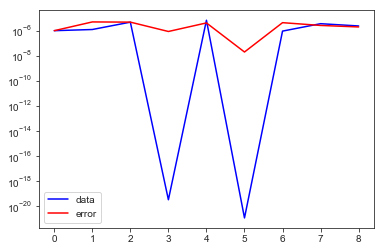

In [137]:
a = 4

plt.semilogy(ydata[indices_high[0][a]],'b')
plt.semilogy(yerr[indices_high[0][a]],'r')
plt.legend(['data','error'])
print xdata[indices_high[0][a]]
             

In [140]:
data = np.array(ydata[indices_high[0][a]])
error = np.array(yerr[indices_high[0][a]])
fitdata = np.ones(len(data))*10**(-4)

indices = np.where(data>10**(-30))
data = data[indices[0]]
error = error[indices[0]]
fitdata = fitdata[indices[0]]
fitdata[5] = 0

print 'data: ' + str(data)
print 'error: ' + str(error)

chi = np.sum(((data-fitdata)/error)**2)
print 'chi: ' + str(chi)


data: [9.83676889e-07 1.21714153e-06 4.68328399e-06 3.43038129e-20
 6.65270100e-06 1.22582281e-21 9.08579317e-07 3.53475271e-06
 2.33172098e-06]
error: [9.83676889e-07 4.88235513e-06 4.70972833e-06 8.47489845e-07
 4.07555164e-06 1.97243902e-08 4.26693223e-06 2.56534760e-06
 1.94548950e-06]
chi: 29872.400206662813


(array([1.12006608e-09]), array([[3.93091236e-16]]))


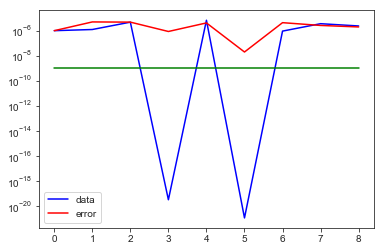

In [141]:
def f(x,a):
    return a

para = curve_fit(f,range(9),data,10**(-6),error)

plt.semilogy(ydata[indices_high[0][a]],'b')
plt.semilogy(yerr[indices_high[0][a]],'r')
plt.semilogy(range(9),np.ones(9)*para[0],'g')
plt.legend(['data','error'])
print para